### 计算机视觉，CNN，图像识别，图像分类问题

* 他们可以是同一类问题，可以结合起来解决问题
* 使用官方的数据集，食物分类问题来学习这些内容，官方数据集真的很亲民
* 图像处理方面的知识，像素，关键词学习
* CNN也可以用在其他的一些领域，但是图像是最典型的

* 图像卷积在层上有讲究：
  1. 输入卷积层
  2. 2D卷积层，激活函数relu
  3. 最大池化层
  4. 全联接层
  5. 输出激活函数

In [11]:
import zipfile
# Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [12]:
!ls pizza_steak

test  train


In [13]:
!ls pizza_steak/train/

pizza steak


In [14]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

### 人应该学会处理图像，用code
Daniel的数据处理过程
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [19]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(dirpath, dirnames, len(filenames))

pizza_steak ['test', 'train'] 0
pizza_steak/test ['steak', 'pizza'] 0
pizza_steak/test/steak [] 250
pizza_steak/test/pizza [] 250
pizza_steak/train ['steak', 'pizza'] 0
pizza_steak/train/steak [] 750
pizza_steak/train/pizza [] 750


In [20]:
# another way to find how many images
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [22]:
# get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


* 数据集信息小结：
* 训练集750， 测试集250
* 标签数量2

In [23]:
# view the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image Shape: {img.shape}")
    return img

Image Shape: (384, 512, 3)


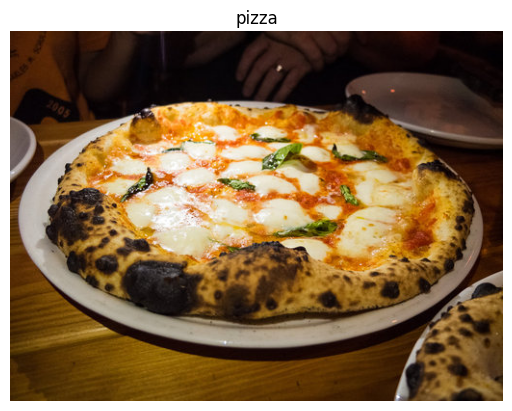

In [27]:
target_dir = "pizza_steak/train/"
target_class = "pizza"
img = view_random_image(target_dir, target_class)

In [29]:
img.shape

(384, 512, 3)

In [30]:
# scale and normalize
img / 255

array([[[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.25098039, 0.10980392, 0.02352941],
        ...,
        [0.09019608, 0.03137255, 0.01960784],
        [0.09411765, 0.03529412, 0.02352941],
        [0.09019608, 0.03137255, 0.01960784]],

       [[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.25098039, 0.10980392, 0.02352941],
        ...,
        [0.0745098 , 0.01568627, 0.00392157],
        [0.0745098 , 0.01568627, 0.00392157],
        [0.07058824, 0.01176471, 0.        ]],

       [[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.24705882, 0.10588235, 0.01960784],
        ...,
        [0.07058824, 0.01176471, 0.        ],
        [0.06666667, 0.00784314, 0.        ],
        [0.05882353, 0.        , 0.        ]],

       ...,

       [[0.23529412, 0.12941176, 0.01568627],
        [0.23137255, 0.1254902 , 0.00784314],
        [0.23921569, 0

### 典型的卷积神经网络结构
* input image
* input layer: input_shape = [batch_size, image_height, image_width, color_channels]
* convolution layer: multiple, can create with tf.keras.layers.ConvXD
* hidden activation: usually ReLU with tf.keras.activations.relu
* pooling layer: Average(tf.keras.layers.AvgPool2D) or Max(tf.keras.layers.MaxPool2D)
* fully connected layer: tf.keras.layers.Dense
* output layer: output_shape = [number_of_classes]
* output activation: tf.keras.activations.sigmoid(binary classification) or tf.keras.activations.softmax

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)
# preprocess data: scale
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# create a cnn model same as vgg
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3, # can alse be (3, 3)
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    # this layer is the same as up one
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, # can alse be (2, 2)
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# fit the model 1
# history_1 = model_1.fit(train_data,
#                         epochs=5, 
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
len(train_data) # batch 32

47

In [37]:
1500 / 32

46.875

In [38]:
# fit the model 1
history_1 = model_1.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 36s 766ms/step - loss: 0.5899 - accuracy: 0.6773 - val_loss: 0.4244 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 37s 778ms/step - loss: 0.4466 - accuracy: 0.8020 - val_loss: 0.3681 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 37s 783ms/step - loss: 0.3815 - accuracy: 0.8360 - val_loss: 0.3280 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 36s 763ms/step - loss: 0.3595 - accuracy: 0.8473 - val_loss: 0.3195 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 37s 780ms/step - loss: 0.3222 - accuracy: 0.8607 - val_loss: 0.3613 - val_accuracy: 0.8360


In [39]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [44]:
# 如果不用卷积网络用之前的分类模型会如何
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 129ms/step - loss: 1.0130 - accuracy: 0.5260 - val_loss: 0.6930 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.7016 - accuracy: 0.5107 - val_loss: 0.7443 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6677 - accuracy: 0.5967 - val_loss: 0.6161 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6126 - accuracy: 0.7247 - val_loss: 0.5885 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5922 - accuracy: 0.7473 - val_loss: 0.5624 - val_accuracy: 0.7560


In [45]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 4)                 602116    
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


比较他们的参数数量和结果

In [46]:
# add more hidden units and layers
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 141ms/step - loss: 7.0803 - accuracy: 0.6260 - val_loss: 1.4744 - val_accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 1.0551 - accuracy: 0.7120 - val_loss: 0.6744 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 1.0573 - accuracy: 0.7187 - val_loss: 1.6718 - val_accuracy: 0.6220
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.9676 - accuracy: 0.7307 - val_loss: 0.5159 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5074 - accuracy: 0.7853 - val_loss: 0.4755 - val_accuracy: 0.7800


In [47]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 用了太多的参数，但是结果还是没有cnn优秀
* cnn专注于选择最重要的特征，非cnn需要更多的参数来提取所有的特征

### 回顾整个流程
1. 导入数据将他们整合，查看数据
2. 准备和处理数据，分割数据，正规化，缩放数据，分批batch
   为什么要分批？
   32有利于你的电脑健康。
3. 创建模型，给自己一个标准，或者叫baseline，超越这个精度
4. 喂数据给模型
5. 评估小模型，能不能干
6. 尝试不同的参数，尝试打败自己的baseline
7. 重复上面的步骤直到满意为止  

Image Shape: (512, 383, 3)
Image Shape: (384, 512, 3)
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


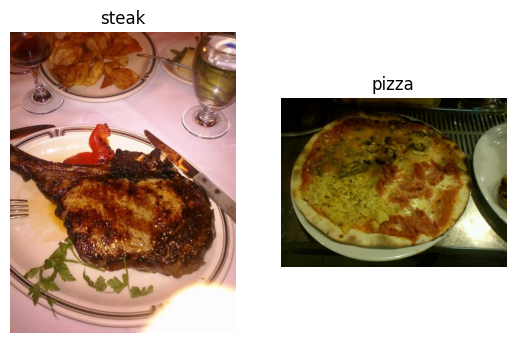

In [48]:
# 1
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# 2
# batch data
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

In [49]:
images, labels = train_data.next()

In [53]:
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [55]:
# 3
# create a baseline (simple one) model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3, # can alse be (3, 3)
        strides=1, # default
        padding="valid", # default
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

这段代码定义了一个基本的卷积神经网络（Convolutional Neural Network，CNN）模型，使用 TensorFlow 的 Keras API。各项的意义：

1. `tf.keras.models.Sequential`: 创建一个顺序模型，即层按顺序堆叠的模型。

2. `tf.keras.layers.Conv2D`: 卷积层，用于学习图像特征。这里有三个卷积层：

   - 第一个卷积层：
     - `filters=10`: 输出空间的维度（即卷积核的数量）为 10。
     - `kernel_size=3`: 卷积核的大小为 3x3。
     - `strides=1`: 卷积的步幅为 1。
     - `padding="valid"`: 不使用 zero-padding。可以是'same'或'valid'，'same'在图像的外部添加零，使得卷积层的输出与输入相同，而'valid'（默认值）则切掉滤波器不适合的地方的多余像素（例如，224像素宽除以3的内核大小（224/3 = 74.6）表示末尾会切掉一个像素）。
     - `activation="relu"`: 使用 ReLU 激活函数。
     - `input_shape=(224, 224, 3)`: 输入张量的形状为 224x224x3，表示图像大小为 224x224 像素，3 表示 RGB 通道。

   - 后续两个卷积层：
     - 相似地，每个都有 10 个卷积核，大小为 3x3，使用 ReLU 激活函数。

3. `tf.keras.layers.Flatten()`: 扁平化层，用于将卷积层的输出展平成一维向量，以便连接到全连接层。

4. `tf.keras.layers.Dense(1, activation="sigmoid")`: 全连接层，输出一个值，使用 Sigmoid 激活函数。通常在二分类问题中使用 Sigmoid 作为输出层的激活函数。

这个模型的整体结构是卷积层堆叠，最后接一个全连接层，适用于图像分类任务。在实际应用中，可能需要根据具体问题和数据集的特点进行调整。

**什么是“特征”**

特征可以被视为图像的任何显著部分。例如，在我们的情况下，特征可能是比萨的圆形。或者是牛排外部的粗糙边缘。

重要的是要注意，这些特征并非由我们定义，相反，模型在对图像应用不同的滤波器时学到它们。

In [56]:
# 4
# fit the model
history_4 = model_4.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 43s 920ms/step - loss: 0.6939 - accuracy: 0.7060 - val_loss: 0.3893 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 43s 926ms/step - loss: 0.3922 - accuracy: 0.8313 - val_loss: 0.3905 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 43s 926ms/step - loss: 0.2793 - accuracy: 0.8987 - val_loss: 0.3380 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 44s 934ms/step - loss: 0.1607 - accuracy: 0.9413 - val_loss: 0.3736 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 43s 926ms/step - loss: 0.0932 - accuracy: 0.9780 - val_loss: 0.4384 - val_accuracy: 0.8100


* steps_per_epoch: 表示每个 epoch 中的训练步骤数，通常设置为训练数据集的样本数除以批次大小。
* validation_data: 这是用于在训练期间评估模型性能的验证数据集。
* validation_steps: 表示在每个验证 epoch 中的步骤数，通常设置为验证数据集的样本数除以批次大小。

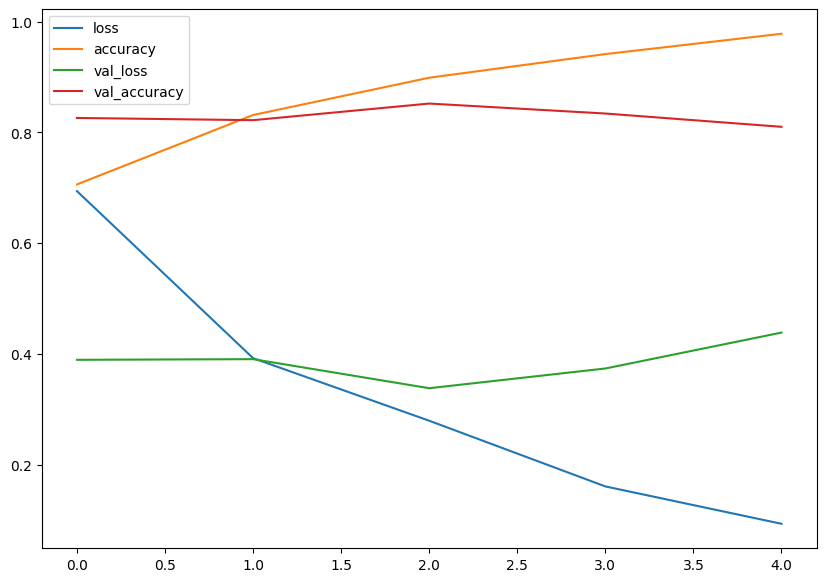

In [58]:
# 5
# evaluate the model
# plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [62]:
# plot the validation and training data separately
def plot_loss_curves(history):
    """
    return separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Losses")
    plt.xlabel("Epochs")
    plt.legend()
    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();   

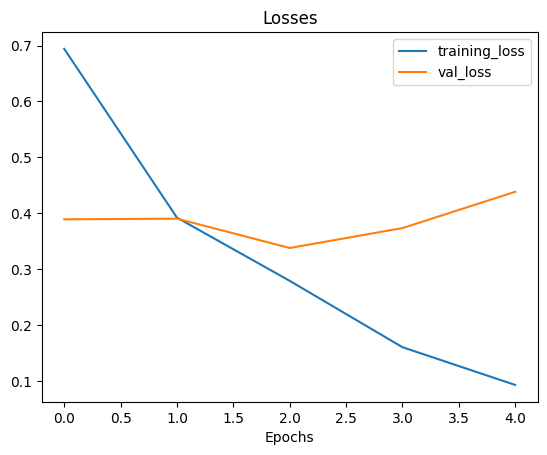

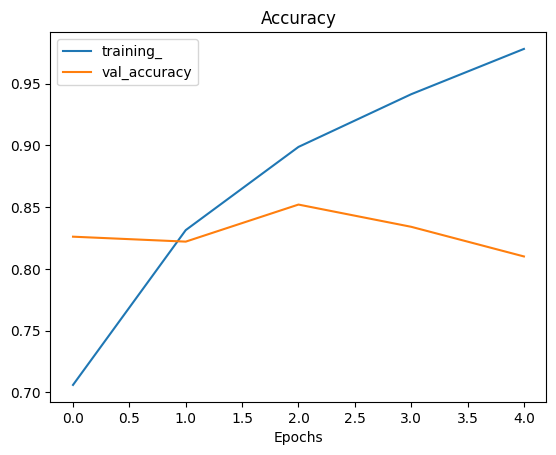

In [63]:
plot_loss_curves(history_4)

In [59]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_17 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 过拟合怎么办：最大池化和数据增强

**过拟合**

当模型的验证损失开始增加时，很可能是因为它对训练数据集进行了过度拟合。过拟合意味着模型在训练数据集中学到的模式过于细致，以至于其对于未见过的数据的泛化能力减弱。

具体而言，过拟合可能表现为模型在训练数据上表现良好，但在新数据上表现不佳。这是因为模型在训练期间过于专注于学习训练数据的细节和噪声，而未能捕捉到数据的真实潜在模式。因此，当验证损失开始上升时，通常意味着需要采取措施来减轻过拟合，例如通过调整模型结构、添加正则化项或增加训练数据等方式。

**拟合（fitting）一个机器学习模型的三个步骤，以及在第一步基础上超越基线（baseline）的方法和减少过拟合的重要性。**

1. **创建基线（Create a baseline）：** 在这一步，首先建立一个基础模型。

2. **通过过拟合超越基线（Beat the baseline by overfitting）：** 通过训练一个更大的模型，超越基线。在这一步，通常会让模型在训练数据上表现得过于好，可能导致过拟合。

3. **减少过拟合（Reduce overfitting）：** 为了避免模型在训练数据上表现良好但在未见过的数据上表现糟糕，需要采取措施来减少过拟合。

目前已经完成了前两步。接下来，增加卷积层、增加卷积滤波器、在展平层的输出上添加另一个密集层等，减少过拟合。

**为什么减少过拟合很重要呢？**

当模型在训练数据上表现良好但在未见过的数据上表现不佳时，这对于实际应用并不有用。例如，如果我们构建了一个比萨对牛排的食物分类器应用，模型在训练数据上表现很好，但用户在尝试其在他们自己的食物图像上时得到的结果并不理想，这样的体验是不好的。

因此，在接下来构建的几个模型中，调整一些参数，并观察训练曲线的变化。具体而言，将构建两个更多的模型：

1. 具有最大池化的 ConvNet
2. 具有最大池化和数据增强的 ConvNet

In [64]:
# create a model to be the baseline
# Input -> Conv layers + ReLU layers (non-linearities) 
# + Max Pooling layers 
# -> Fully connected (dense layer) as Output
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 325ms/step - loss: 0.6071 - accuracy: 0.6553 - val_loss: 0.4249 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 16s 336ms/step - loss: 0.4322 - accuracy: 0.7987 - val_loss: 0.3568 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 16s 334ms/step - loss: 0.4151 - accuracy: 0.8153 - val_loss: 0.3454 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 16s 336ms/step - loss: 0.3809 - accuracy: 0.8360 - val_loss: 0.3299 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 16s 336ms/step - loss: 0.3572 - accuracy: 0.8533 - val_loss: 0.3009 - val_accuracy: 0.8700


In [65]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

最大池化（Max Pooling）是卷积神经网络（Convolutional Neural Network，CNN）中一种常用的池化操作。在 CNN 中，池化层用于减小输入的空间维度（宽度和高度），同时保留最重要的信息。

最大池化的操作是在输入的每个小区域中选择最大的值作为输出。通常，池化层通过滑动一个固定大小的窗口（称为池化窗口）来遍历输入，在每个窗口中选择最大值。这样可以有效地减小特征图的尺寸，减少参数数量，并提取图像中的主要特征。

例如，考虑一个2x2的最大池化操作。对于输入区域：

```
1  2
3  4
```

最大池化操作会选择其中的最大值（4），从而形成一个新的池化后的特征：

```
4
```

这种操作有助于使模型对图像中的变化更具有鲁棒性，同时降低了计算成本。最大池化通常与卷积操作交替使用，构成了卷积神经网络的重要组成部分。

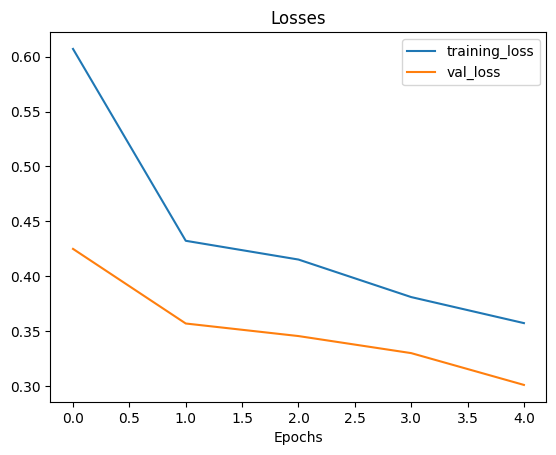

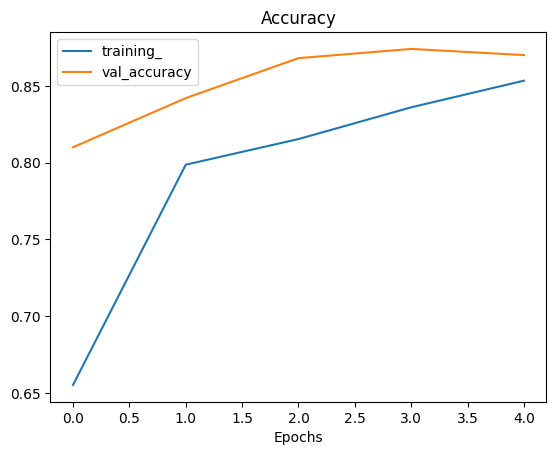

In [66]:
# plot loss curves of model 5
plot_loss_curves(history_5)

**数据增强**

数据增强（Data Augmentation）是一种在训练过程中通过对原始数据集进行随机变换来扩充数据量的技术。这一方法通常用于图像分类、目标检测和其他计算机视觉任务中，目的是提高模型的泛化能力和鲁棒性。

数据增强通过对原始图像进行一系列随机变换，生成具有一定差异性的新样本。这些随机变换可能包括：

1. **旋转：** 对图像进行随机角度的旋转。
2. **翻转：** 水平翻转或垂直翻转图像。
3. **缩放：** 随机缩放图像的大小。
4. **平移：** 随机平移图像的位置。
5. **亮度调整：** 调整图像的亮度，使其更暗或更亮。
6. **对比度调整：** 调整图像的对比度。

数据增强的好处在于它可以有效地增加训练数据的多样性，使模型更好地适应不同的场景和变化。这对于避免过拟合（overfitting）和提高模型性能至关重要，尤其是在数据集有限的情况下。在深度学习任务中，数据增强通常与神经网络的训练过程结合使用，以提高模型的泛化性能。

---
“鲁棒性”这个术语来自英文词汇，其英文为“robustness”。在计算机科学、控制论、工程学以及机器学习等领域，这个术语被用来描述系统、算法或模型对于变化、噪声、异常情况等的处理能力。

“Robust”一词的本意是“强健的”、“坚固的”，衍生为“鲁棒”的中文翻译。在技术领域，鲁棒性表示系统或模型能够在各种条件下都能够保持稳定和高效的性能，而不容易受到外部变化的影响。

因此，“鲁棒性”在计算机科学等领域的使用是为了强调系统、算法或模型在实际应用中的稳定性和适应性。这个概念强调了一个良好的系统或模型不仅要在理想条件下表现良好，还要能够处理各种不确定性和变化。

---


In [67]:
# create ImageDataGenarator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

这段代码是使用Keras中的`ImageDataGenerator`类创建了一个数据增强的实例，用于在训练过程中对图像进行增强。主要参数如下：

- `rescale=1/255.`: 对图像的每个像素值进行归一化，将其缩放到 0 到 1 之间。

以下是数据增强的各项操作：

- `rotation_range=20`: 随机旋转图像，旋转的角度在 0 到 20 度之间。

- `shear_range=0.2`: 随机错切变换图像。

- `zoom_range=0.2`: 随机缩放图像。

- `width_shift_range=0.2`: 随机水平平移图像。

- `height_shift_range=0.2`: 随机垂直平移图像。

- `horizontal_flip=True`: 随机水平翻转图像。

这些操作的目的是通过对训练图像进行随机变换，增加数据的多样性，提高模型的鲁棒性和泛化能力。

In [79]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [69]:
# visualize data
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

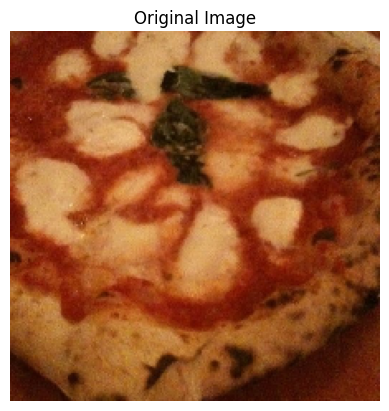

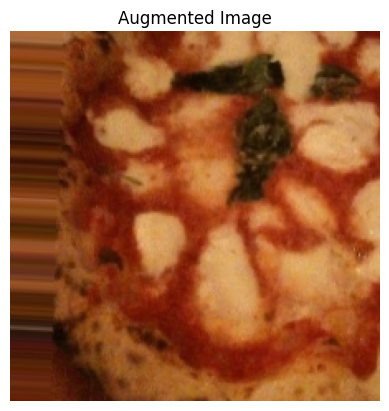

In [72]:
# show original image and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False);

In [76]:
# use the augmented data to create and fit model
# same as model 5
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 451ms/step - loss: 0.7495 - accuracy: 0.4847 - val_loss: 0.6825 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.7111 - accuracy: 0.5107 - val_loss: 0.6821 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6848 - accuracy: 0.6067 - val_loss: 0.6572 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 23s 478ms/step - loss: 0.6827 - accuracy: 0.5980 - val_loss: 0.6630 - val_accuracy: 0.5360
Epoch 5/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6734 - accuracy: 0.5947 - val_loss: 0.6399 - val_accuracy: 0.5380


In [75]:
valid_data, test_data

(<keras.src.preprocessing.image.DirectoryIterator at 0x17fe79690>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x296c1e750>)

为什么模型在训练集上一开始表现不佳？
对数据进行数据增强（data augmentation）时的影响？

1. **数据不良表现的原因：** 在创建 `train_data_augmented` 时，通过设置 `shuffle=False` 关闭了数据的随机排序，这意味着我们的模型每次只看到一种图像的批次。例如，由于披萨类是第一个加载的类，因此其性能仅在单一类别上进行度量，而不是在两个类别上。相比之下，验证数据的性能逐渐提高，因为它包含了被随机排序的数据。

2. **解决方法：** 通过在未来的数据生成器上设置 `shuffle=True` 来解决这个问题。

3. **训练时间的增加：** 在使用增强数据进行训练时，注意到每个时期的时间比使用非增强数据进行训练时更长（每个时期约为 25 秒 vs. 约为 10 秒）。这是因为 `ImageDataGenerator` 实例在加载到模型时对数据进行了增强。这样做的好处是保留了原始图像的不变性，但缺点是加载所需的时间更长。

简而言之，这一系列操作的目的是改进模型的性能，确保数据随机化，并理解使用数据增强可能导致训练时间延长的情况。

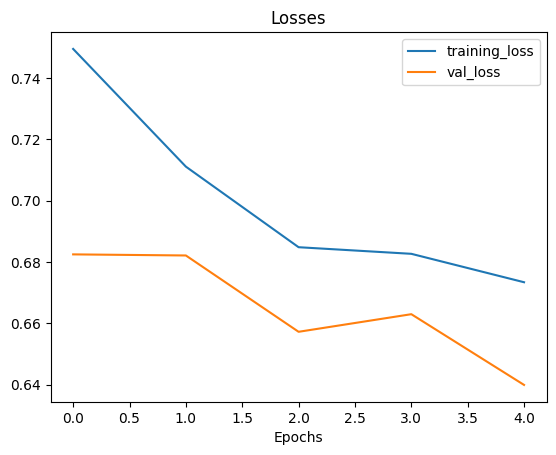

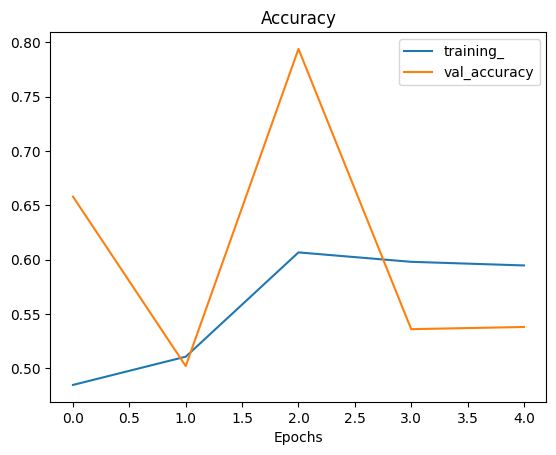

In [77]:
# check 
plot_loss_curves(history_6)

In [80]:
print("Augmented training images with shuffle:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Augmented training images with shuffle:
Found 1500 images belonging to 2 classes.


In [81]:
# recreate a model 7 to train it 
# use the augmented data to create and fit model
# same as model 7
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6489 - accuracy: 0.6160 - val_loss: 0.5653 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 20s 429ms/step - loss: 0.5576 - accuracy: 0.7080 - val_loss: 0.4277 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 20s 424ms/step - loss: 0.5222 - accuracy: 0.7507 - val_loss: 0.4639 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4882 - accuracy: 0.7700 - val_loss: 0.4266 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 21s 434ms/step - loss: 0.4734 - accuracy: 0.7733 - val_loss: 0.4385 - val_accuracy: 0.7840


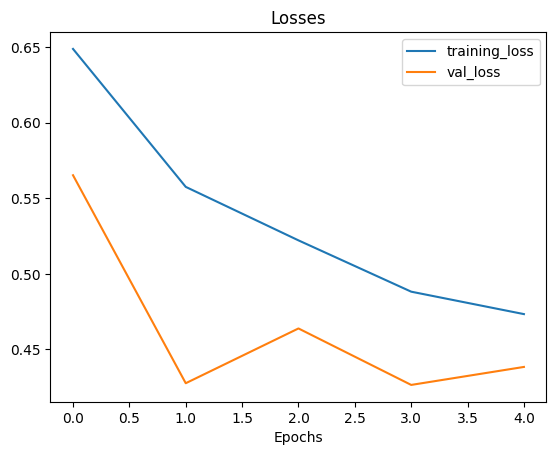

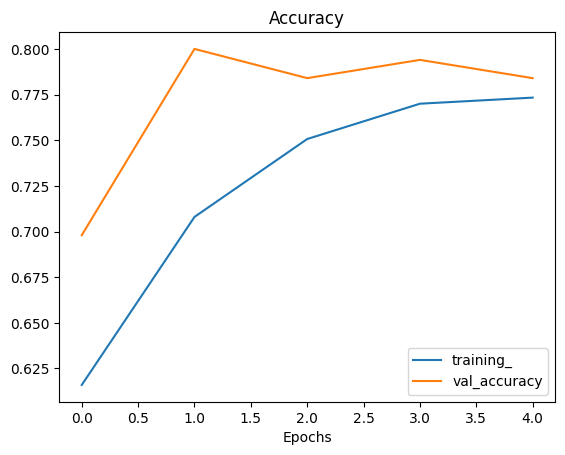

In [82]:
# visualize it 
plot_loss_curves(history_7)

### 继续优化的行为
继续改进模型的几种方法和策略：

1. **增加模型层数：** 可以尝试增加模型的卷积层数，例如添加更多的卷积层。

2. **增加卷积层中的滤波器数量：** 可以尝试增加每个卷积层中滤波器的数量，例如从 10 增加到 32、64 或 128。这些数字并非一成不变，通常需要通过试错找到最佳值。

3. **训练更长时间：** 可以尝试增加训练时的时期数，让模型有更多的机会学习数据。

4. **找到理想的学习率：** 可以尝试找到一个最适合模型的学习率。

5. **获取更多数据：** 提供模型更多学习的机会。

6. **使用迁移学习：** 利用另一个图像模型已经学到的知识，并根据自己的用例进行调整。

对这些设置的调整通常在模型开发中被称为超参数调优。超参数调优类似于调整烤箱设置来烹饪你喜欢的菜肴，尽管烤箱会完成大部分工作，但通过调整旋钮可以帮助它更好地完成任务。

回到最初的模型（`model_1` 或 CNN 解释中的 TinyVGG 架构）进行尝试。

In [83]:
# back to model 1
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 37s 785ms/step - loss: 0.6410 - accuracy: 0.6053 - val_loss: 0.4363 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 37s 794ms/step - loss: 0.5006 - accuracy: 0.7613 - val_loss: 0.3704 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 39s 817ms/step - loss: 0.4812 - accuracy: 0.7880 - val_loss: 0.3566 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 38s 805ms/step - loss: 0.4843 - accuracy: 0.7747 - val_loss: 0.3524 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 40s 855ms/step - loss: 0.4797 - accuracy: 0.7807 - val_loss: 0.4424 - val_accuracy: 0.7840


In [84]:
model_1.summary(), model_8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

(None, None)

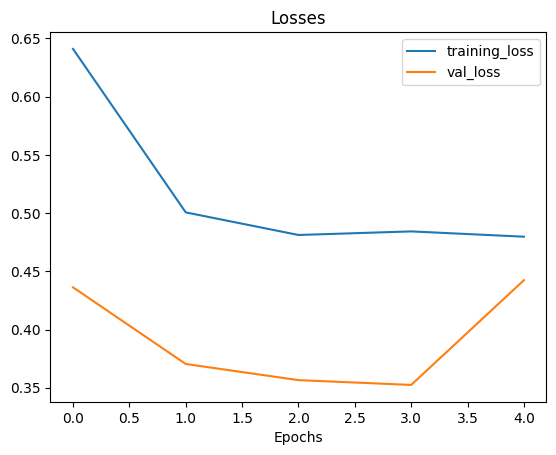

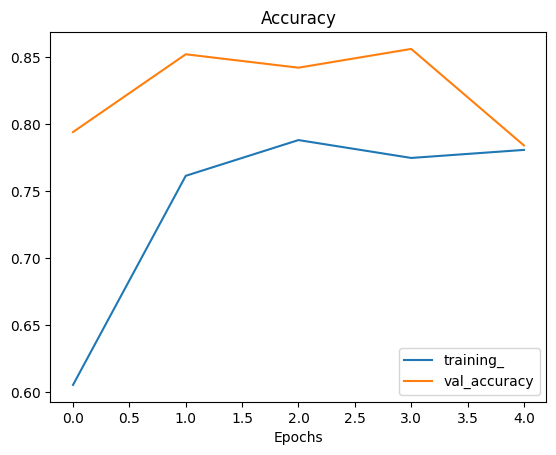

In [85]:
# check model_8
plot_loss_curves(history_8)

### 使用模型进行预测

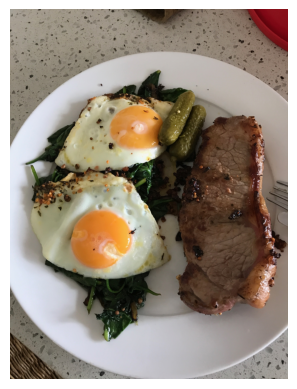

In [87]:
# use a image from Daniel
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [88]:
steak.shape

(4032, 3024, 3)

In [89]:
# need to process the image to (244, 244, 3)
# create a function to do so
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, color_channels)
    """
    # read in target image file
    img = tf.io.read_file(filename)
    # decode the read file into a tensor and ensure 3 color channels
    img = tf.image.decode_image(img, channels=3)
    # resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # rescale the image
    img = img / 255
    return img

In [96]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [97]:
# predict time
# another dimension as batch size
print("before add dim")
print(steak.shape)
print("after add dim")
steak = tf.expand_dims(steak, axis=0)
print(steak.shape)
prob = model_8.predict(steak)
pred = class_names[int(tf.round(prob)[0][0])]

before add dim
(224, 224, 3)
after add dim
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


In [98]:
pred

'steak'

In [99]:
# create a functiont to show the predicted res
def pred_and_plot(model, filename, class_names):
    """
    Import an image located at filename, makes a predictions on it, 
    with a trained model and plot the image with the predicted class
    as the title.
    """
    # import
    img = load_and_prep_image(filename)
    # make prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]
    # plot
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 18ms/step


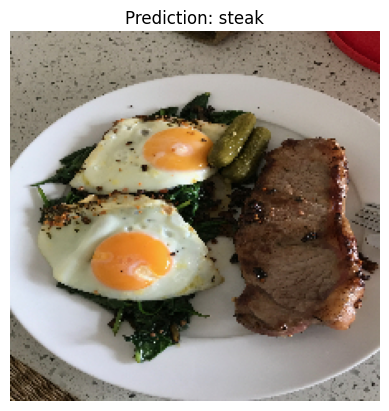

In [100]:
# test model
pred_and_plot(model_8, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 24ms/step


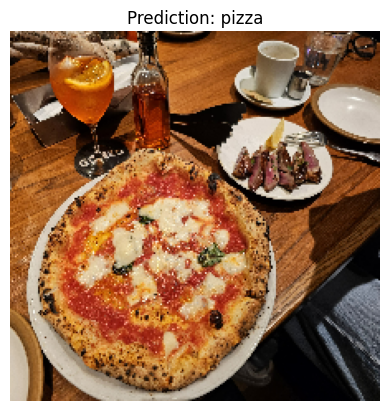

In [101]:
# test my image
pred_and_plot(model_8, "my-pizza-image.jpeg", class_names)

### 多分类问题，softmax你好啊！

In [102]:
# import data food 101
# https://www.kaggle.com/datasets/dansbecker/food-101

import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [106]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 10 directories and 0 ima

In [107]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [108]:
# get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape: (512, 512, 3)


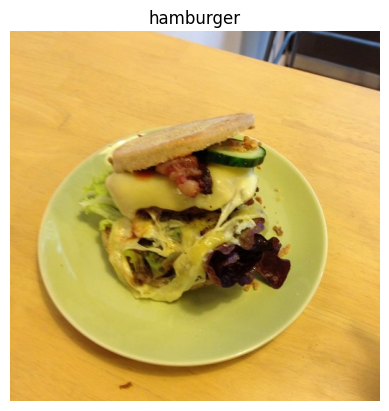

In [112]:
# visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [113]:
# preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [115]:
# baseline model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [116]:
# fit
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 182s 775ms/step - loss: 2.1025 - accuracy: 0.2407 - val_loss: 1.9918 - val_accuracy: 0.3064
Epoch 2/5
235/235 [==============================] - 188s 801ms/step - loss: 1.8355 - accuracy: 0.3709 - val_loss: 1.8274 - val_accuracy: 0.3604
Epoch 3/5
235/235 [==============================] - 190s 810ms/step - loss: 1.5334 - accuracy: 0.4892 - val_loss: 1.8666 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 181s 770ms/step - loss: 0.9844 - accuracy: 0.6747 - val_loss: 2.2127 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 181s 768ms/step - loss: 0.4119 - accuracy: 0.8688 - val_loss: 2.9916 - val_accuracy: 0.3076


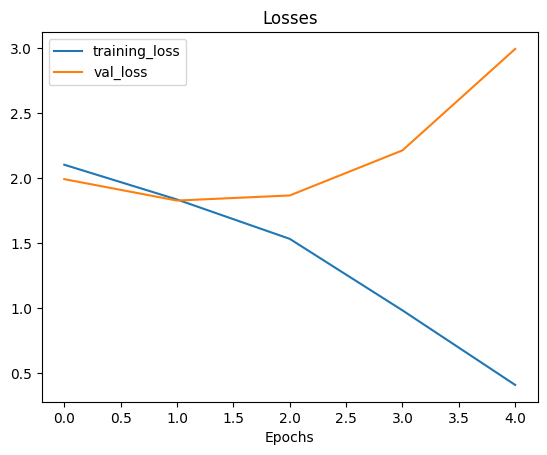

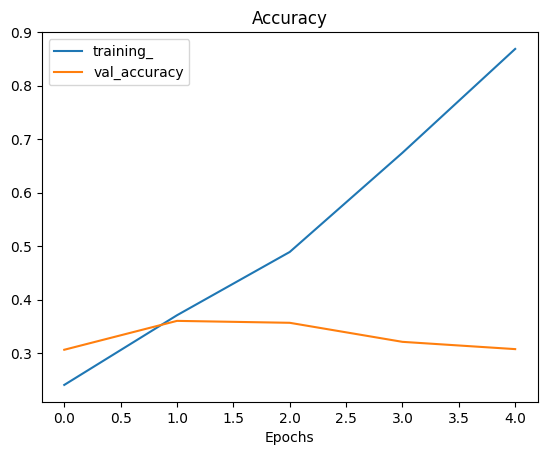

In [117]:
# plot it 
plot_loss_curves(history_9)

 很明显，模型过拟合了。

 所以需要进行调整。

 1. 减少层数：简化模型
 2. 增加层数：复杂化模型
 3. 数据增强
 4. 迁移学习

In [118]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=['accuracy'])
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 72s 306ms/step - loss: 2.0918 - accuracy: 0.2472 - val_loss: 1.9059 - val_accuracy: 0.3224
Epoch 2/5
235/235 [==============================] - 73s 309ms/step - loss: 1.7639 - accuracy: 0.3917 - val_loss: 1.8876 - val_accuracy: 0.3444
Epoch 3/5
235/235 [==============================] - 73s 309ms/step - loss: 1.4163 - accuracy: 0.5335 - val_loss: 1.9067 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 73s 311ms/step - loss: 0.9611 - accuracy: 0.7028 - val_loss: 2.0749 - val_accuracy: 0.3336
Epoch 5/5
235/235 [==============================] - 72s 308ms/step - loss: 0.5462 - accuracy: 0.8471 - val_loss: 2.3643 - val_accuracy: 0.3176


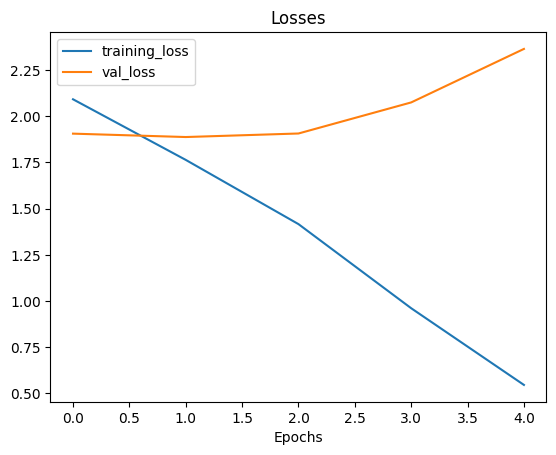

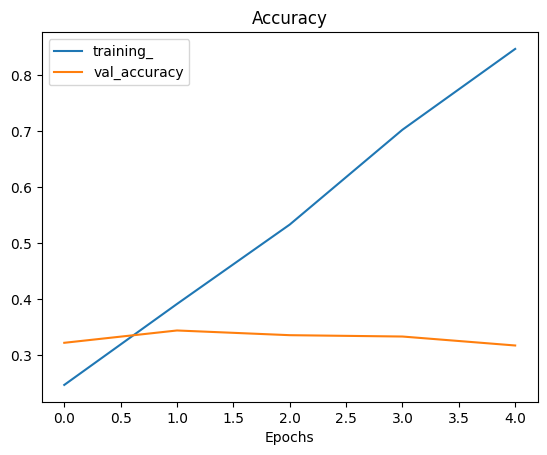

In [119]:
# plot
plot_loss_curves(history_10)

### 所谓控制变量法
持续进行实验，同时每次跟踪自己修改的变量，看每个变量对实验的影响

In [120]:
# still bad
# create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


这里使用clone_model使用和之前一样的模型，但是这次使用增强数据，就是一种控制变量

In [122]:
# model 11
model_11 = tf.keras.models.clone_model(model_10)
model_11.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 477ms/step - loss: 2.1721 - accuracy: 0.2023 - val_loss: 2.0385 - val_accuracy: 0.2624
Epoch 2/5
235/235 [==============================] - 114s 483ms/step - loss: 2.0520 - accuracy: 0.2693 - val_loss: 1.9861 - val_accuracy: 0.2944
Epoch 3/5
235/235 [==============================] - 102s 433ms/step - loss: 1.9928 - accuracy: 0.3009 - val_loss: 1.8047 - val_accuracy: 0.3804
Epoch 4/5
235/235 [==============================] - 99s 422ms/step - loss: 1.9423 - accuracy: 0.3248 - val_loss: 1.8480 - val_accuracy: 0.3656
Epoch 5/5
235/235 [==============================] - 98s 417ms/step - loss: 1.9186 - accuracy: 0.3281 - val_loss: 1.7197 - val_accuracy: 0.4044


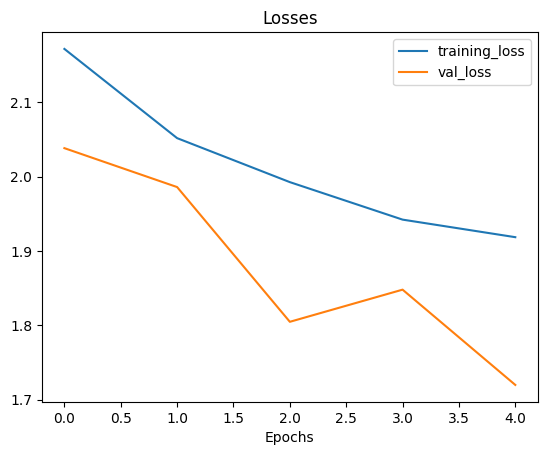

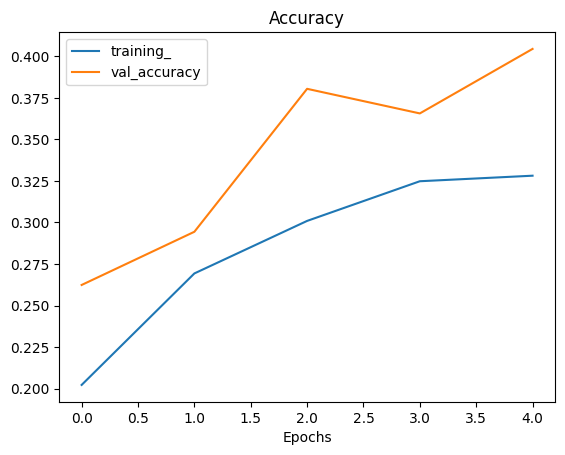

In [123]:
# plot
plot_loss_curves(history_11)

In [124]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [125]:
# Make prediction
# modified the prediction function to predict multi class
# create a functiont to show the predicted res
def pred_and_plot(model, filename, class_names):
    """
    Import an image located at filename, makes a predictions on it, 
    with a trained model and plot the image with the predicted class
    as the title.
    """
    # import
    img = load_and_prep_image(filename)
    # make prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # get the predicted class
    if len(pred[0]) > 1:
        pred_class = class_names[pred.argmax()]
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]
    # plot
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 49ms/step


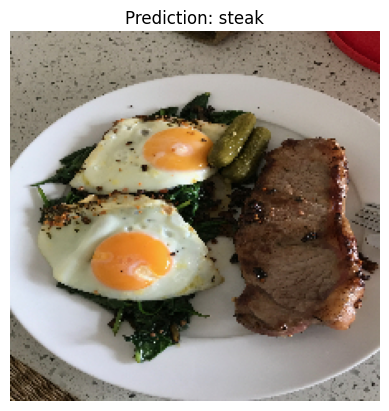

In [126]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


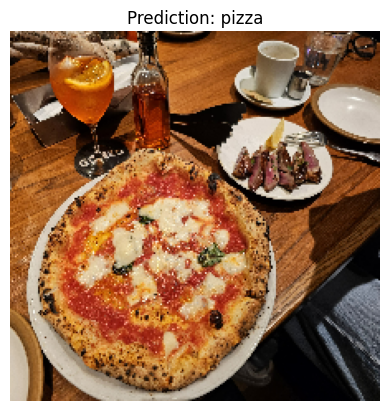

In [127]:
pred_and_plot(model_11, "my-pizza-image.jpeg", class_names)

In [128]:
# save model
model_11.save("saved_cnn_model_11")

INFO:tensorflow:Assets written to: saved_cnn_model_11/assets


INFO:tensorflow:Assets written to: saved_cnn_model_11/assets


In [129]:
# load model
loaded_model_11 = tf.keras.models.load_model("saved_cnn_model_11")
loaded_model_11.evaluate(train_data_augmented)

235/235 [==============================] - 71s 302ms/step - loss: 1.8609 - accuracy: 0.3517


[1.8609281778335571, 0.35173332691192627]

In [130]:
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 124ms/step - loss: 1.7197 - accuracy: 0.4044


[1.71970796585083, 0.4043999910354614]

### 果然需要迁移学习！用别人的模型快速学习！